<a href="https://colab.research.google.com/github/aovladi/cs480student/blob/main/04/CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

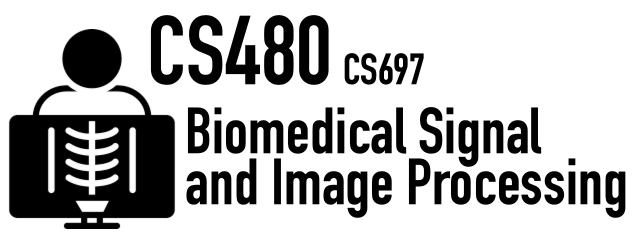
#Assignment 4

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [ ]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# we are using mahotas again, so lets install it!
!pip install mahotas

     |████████████████████████████████| 5.7MB 12.2MB/s 


In [ ]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [ ]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [ ]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'xray/normal/'
PNEUMONIA_DIR = 'xray/pneumonia/'

In [ ]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [ ]:
# TODO: Please display this image and print the dimensions!


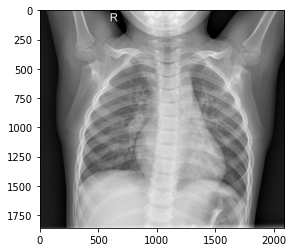

In [ ]:
# TODO: YOUR CODE
plt.imshow(img, cmap="gray")

In [ ]:
print("Image dimetions: {} x {}".format(img.shape[0], img.shape[1]))

Image dimetions: 1858 x 2090


**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [ ]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) Resize: mh.imresize( loaded_image, (300, 300) )
# TODO: Operation 2) Unifying: pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [ ]:
def display(array, title, n):
  fig=plt.figure(figsize=(20,5))
  fig.suptitle('{} {} images'.format(n,title), fontsize=48)
  columns = n
  rows = 1
  for i in range(1,columns*rows +1):
    img = array[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
  plt.show()

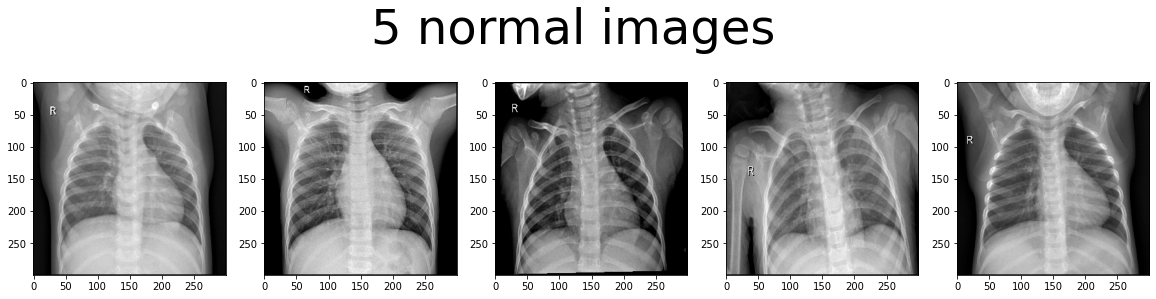

In [ ]:
# TODO: YOUR CODE
display(normal_images, "normal", 5)

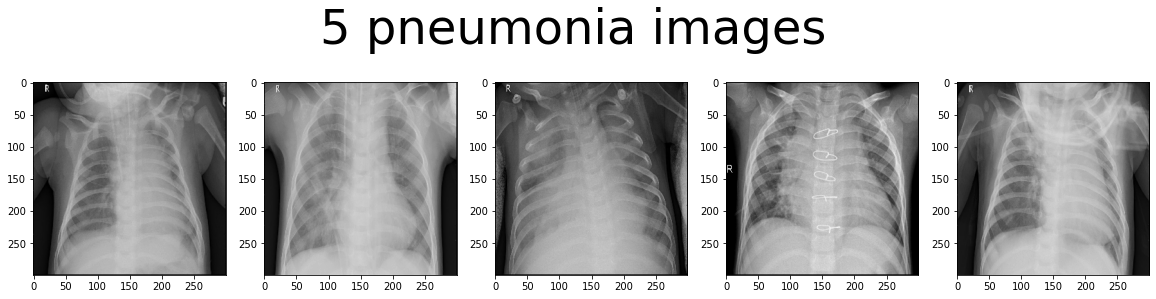

In [ ]:
display(pneumonia_images, "pneumonia", 5)

**Task 3:** Setup training and testing data. [15 Points]

In [ ]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [ ]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [ ]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target = np.concatenate((np.zeros(TRAINING_COUNT), np.ones(TRAINING_COUNT))) # TODO
training_target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [ ]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [ ]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = np.concatenate((np.zeros(TESTING_COUNT), np.ones(TESTING_COUNT))) # TODO
testing_target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [ ]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [ ]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [ ]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [ ]:
# TODO: YOUR ANSWER
# It creates N (n_estimators) decision trees, which is called forest. 
# These trees operate as an ensamble: each individual tree 
# makes a prediction and the class with the most votes becomes 
# the model’s prediction.
#

In [ ]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.9125

In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [ ]:
# TODO: Given that we have a balanced distribution among our classes (60 for normal and 60 for pheumonia)
# the performance is good, more than 90%

**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

Misclassified images are: [23 26 44 54 56 73 79]. 
Index starts from 0.


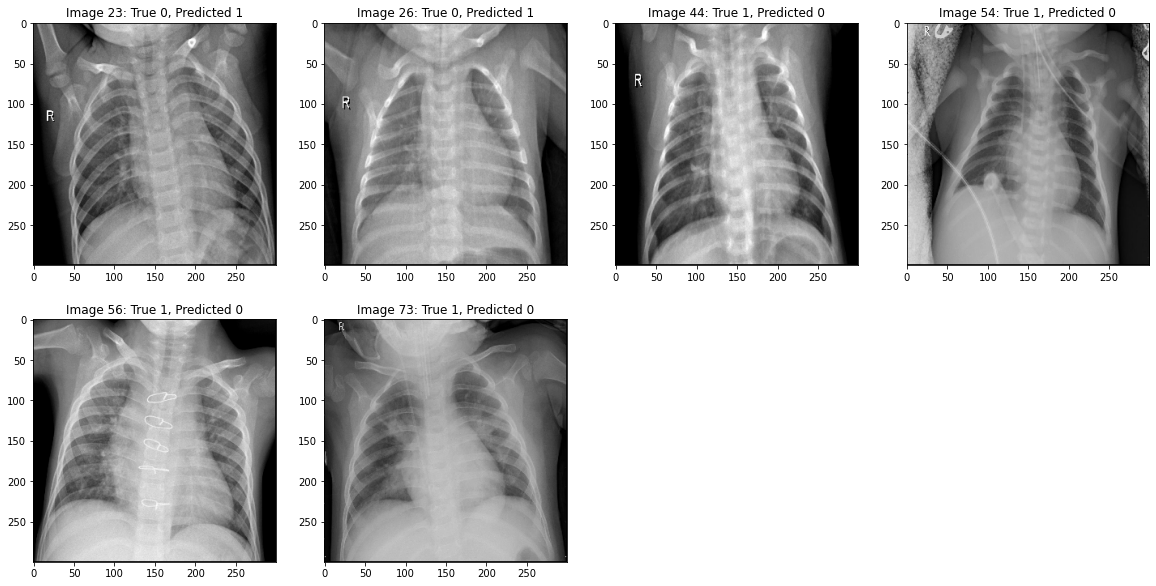

In [ ]:
# TODO: YOUR CODE AND YOUR ANSWER
# predict labels
predictions = clf.predict(testing_data)
# identify misclassifications
misclassified = predictions == testing_target
# identify indexes of misclassified samples
misclassified_idx = np.where(misclassified==False)[0]
print("Misclassified images are: {}. \nIndex starts from 0.".format(misclassified_idx))
# collect misclassified images
images = [testing_data[i] for i in misclassified_idx]
# plot misclassified images
fig=plt.figure(figsize=(20,5*(len(misclassified_idx)//4 + 1)))
columns = 4
rows = len(misclassified_idx)//4 + 1
for i in range(1,columns*rows +1):
  if i < len(images):
    img = np.resize(images[i-1], (300, 300) )
    fig.add_subplot(rows, columns, i).set_title("Image {}: True {}, Predicted {}".format(
                                            misclassified_idx[i-1],
                                            int(testing_target[misclassified_idx[i-1]]),
                                            int(predictions[misclassified_idx[i-1]])))
    plt.imshow(img, cmap="gray")
plt.show()

 Do you have an idea why these images were problematic?

 To be honest, I don't know. My thoughts are: It may be due to some obstacles in the images (e.g. img 54 seems to have some tubes in the image and img 56 has something in the spine). Maybe imgs 23 and 26 are not as clear as the rest normal images. Maybe positions of arms have some impact.  I would consult with physicians and see what they can suggest.

 I tried to display correctly predicted images, but it didn't help.

In [ ]:
good_images = list(range(len(testing_target)))
good_images = np.delete(good_images,misclassified_idx)

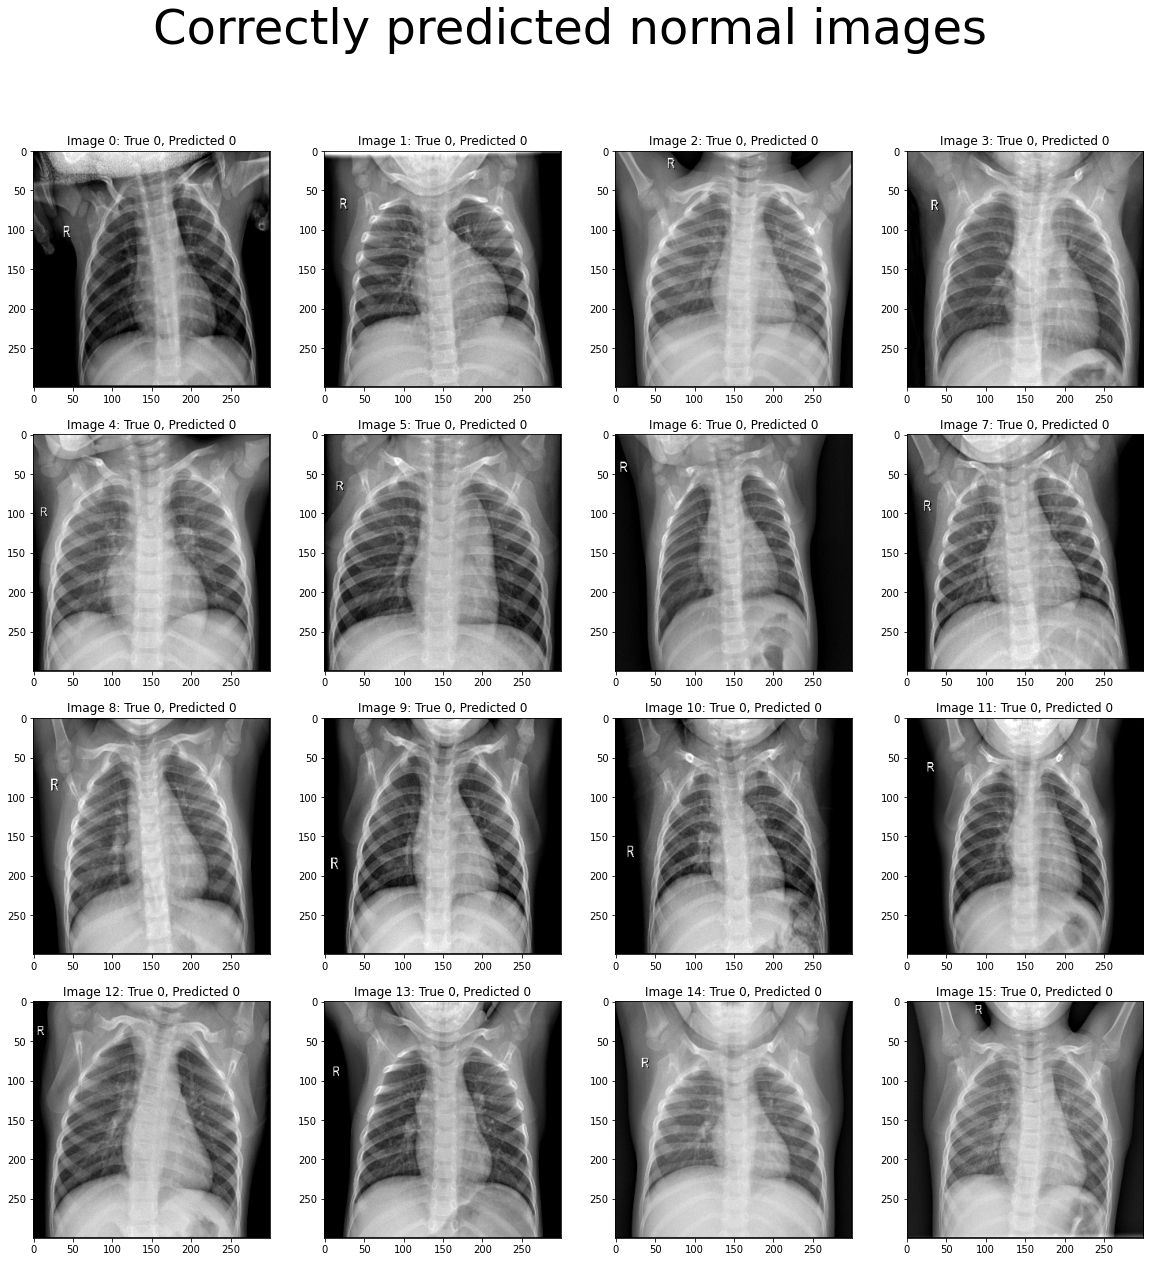

In [ ]:
fig=plt.figure(figsize=(20,20))
fig.suptitle('Correctly predicted normal images'.format(n,title), fontsize=48)
columns = 4
rows = 4
for i in range(1,columns*rows +1):
  img = np.resize( testing_data[good_images[i-1]], (300, 300) )
  fig.add_subplot(rows, columns, i).set_title("Image {}: True {}, Predicted {}".format(
                                            good_images[i-1],
                                            int(testing_target[good_images[i-1]]),
                                            int(predictions[good_images[i-1]])))
  plt.imshow(img, cmap="gray")
plt.show()

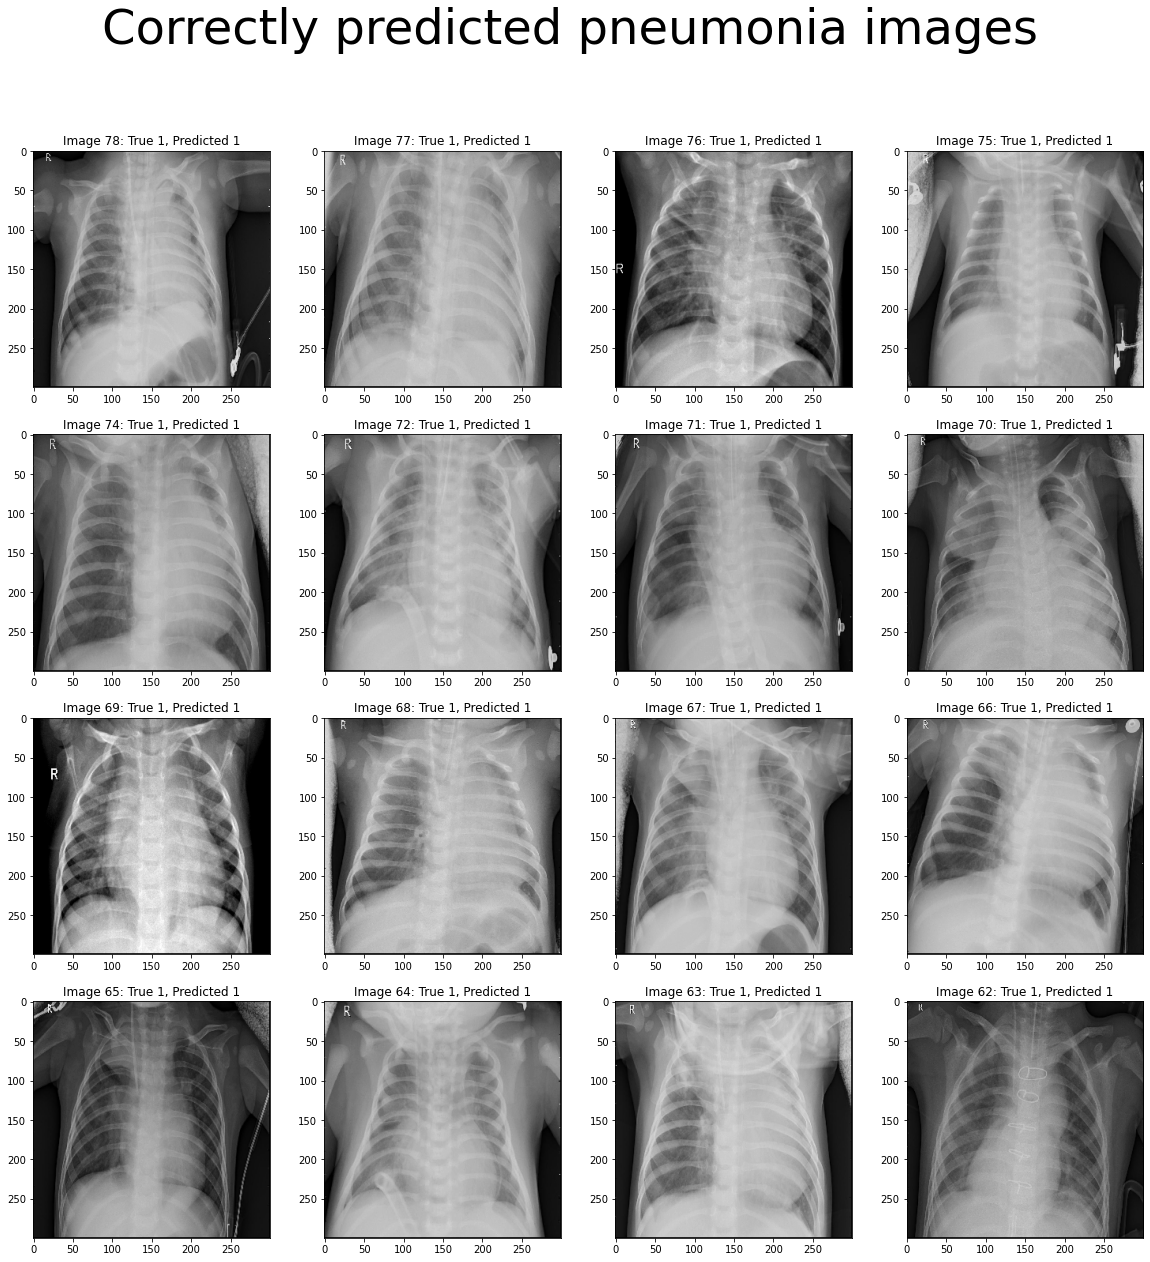

In [ ]:
fig=plt.figure(figsize=(20,20))
fig.suptitle('Correctly predicted pneumonia images'.format(n,title), fontsize=48)
columns = 4
rows = 4
for i in range(1,columns*rows +1):
  img = np.resize( testing_data[good_images[-1*i]], (300, 300) )
  fig.add_subplot(rows, columns, i).set_title("Image {}: True {}, Predicted {}".format(
                                            good_images[-1*i],
                                            int(testing_target[good_images[-1*i]]),
                                            int(predictions[good_images[-1*i]])))
  plt.imshow(img, cmap="gray")
plt.show()

In [ ]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [ ]:
# TODO: YOUR ANSWER
# 1)Collect more data
# 2)If possible, eliminate noise, if there is any noise in the data.
# Or tune parameters (n_estimators, max_features, min_sample_leaf):
# 3)increase number of estimators
# 4)try entropy instead of gini index
# 5)try 2 and 3 together 
# 6)If we are talking about a general classification performance (not this RF classifier),
# we can try Deep Learning and CNNs.
# 7)We can also do multiple runs with different seeds and pick based on performance on the test set

In [ ]:
# 3)increase number of estimators
clf2 = RandomForestClassifier(n_estimators=500)
fitted = clf2.fit( training_data, training_target )
clf2.score( testing_data, testing_target )

0.925

In [ ]:
# 4)use entropy instead of gini index
clf3 = RandomForestClassifier(criterion="entropy")
fitted = clf3.fit( training_data, training_target )
clf3.score( testing_data, testing_target )
# Here it seems not to have an impact, but in some runs I have a better performance.
# So this may help or not, depends on the run and random seed probably.

0.9125

In [ ]:
# 5)try 2 and 3 together 
clf4 = RandomForestClassifier(n_estimators=500,criterion="entropy")
fitted = clf4.fit( training_data, training_target )
clf4.score( testing_data, testing_target )

0.9375

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw